# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [15]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [16]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I take comfort in reading t...
1,✅ Trip Verified | The worst journey in my lif...
2,✅ Trip Verified | The airplanes and the lounge...
3,✅ Trip Verified | One of the worst experiences...
4,✅ Trip Verified | Cancelled our flight last-m...


In [17]:
df.to_csv("/content/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [18]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [19]:
df.head()

,reviews
0,I take comfort in reading the last ten or so...
1,The worst journey in my life. The connection...
2,"The airplanes and the lounges are worn out, o..."
3,One of the worst experiences on the worst air...
4,Cancelled our flight last-minute then moved ...


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
!pip install pyLDAvis==2.1.2

In [22]:
import numpy as np
import json
import glob

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from nltk.corpus import stopwords


import pyLDAvis
import pyLDAvis.gensim

In [23]:
stopwords = stopwords.words("english")

In [24]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [25]:
df.reviews= df['reviews'].str.lower()
df.head()

,reviews
0,i take comfort in reading the last ten or so...
1,the worst journey in my life. the connection...
2,"the airplanes and the lounges are worn out, o..."
3,one of the worst experiences on the worst air...
4,cancelled our flight last-minute then moved ...


In [26]:
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df.head()

,reviews
0,take comfort reading last ten reviews see i'm ...
1,worst journey life. connection time lhr 1 hour...
2,"airplanes lounges worn out, old broken. dallas..."
3,one worst experiences worst airline. flight de...
4,cancelled flight last-minute moved us onto fli...


In [27]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
df['reviews'] = df['reviews'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
df

,reviews
0,take comfort read last ten review see i'm trav...
1,worst journey life. connection time lhr 1 hour...
2,"airplanes lounge wear out, old broken. dallas ..."
3,one worst experience worst airline. flight del...
4,cancel flight last-minute move us onto flight ...
...,...
995,would like compliment british airways crew com...
996,arrive airport discover flight delay several h...
997,loyal customers british airways since little g...
998,gatwick las vegas. board group number seem wor...


In [29]:
!pip install vaderSentiment

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['reviews'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Sentiment,Analysis
0,take comfort read last ten review see i'm trav...,-0.7345,Negative
1,worst journey life. connection time lhr 1 hour...,-0.7782,Negative
2,"airplanes lounge wear out, old broken. dallas ...",-0.5851,Negative
3,one worst experience worst airline. flight del...,-0.9586,Negative
4,cancel flight last-minute move us onto flight ...,0.4404,Neutral


In [31]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    484
Negative    413
Neutral     103
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fcb4af6d330>,
 [Text(0.05526875904936967, 1.0986106518112515, 'Positive'),
  Text(-0.40172199483921256, -1.0240212101623696, 'Negative'),
  Text(1.2799375296229292, -0.4292550759895026, 'Neutral')],
 [Text(0.030146595845110726, 0.599242173715228, '48.4%'),
  Text(-0.21912108809411593, -0.5585570237249288, '41.3%'),
  Text(0.8058865927255479, -0.270271714511909, '10.3%')])

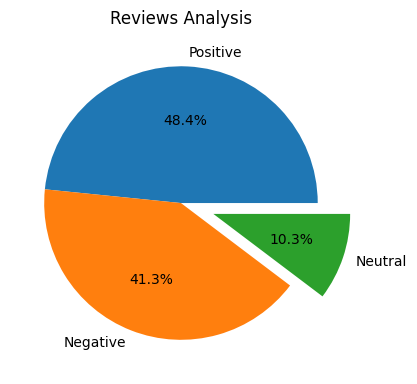

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

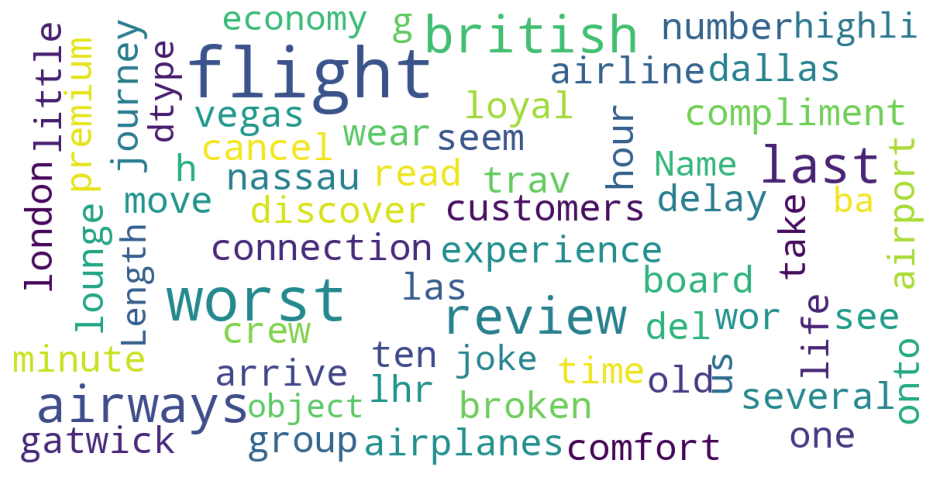

In [34]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.reviews)